In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

import sys
if not sys.warnoptions:
    import warnings
    #suppress warning messages (those with peach background)
    warnings.simplefilter('ignore')
    warnings.filterwarnings('ignore')

In [2]:
df_var=pd.read_csv(r"D:\NUS\Semester 2\Network Analytics\Group Project\Datasets\Total Exports\asean3.csv")

In [3]:
df_var.head()

,Nomenclature,ReporterISO3,ProductCode,ReporterName,PartnerISO3,PartnerName,Year,TradeFlowName,TradeFlowCode,TradeValue in 1000 USD
0,CP,CHN,Total,China,WLD,World,1992,Export,6,8.366835e+07
1,CP,CHN,Total,China,WLD,World,1993,Export,6,9.075596e+07
2,CP,CHN,Total,China,WLD,World,1994,Export,6,1.200602e+08
3,CP,CHN,Total,China,WLD,World,1995,Export,6,1.474794e+08
4,CP,CHN,Total,China,WLD,World,1996,Export,6,1.499930e+08


In [4]:
df_var.groupby(['ReporterISO3'])['Year'].count()

ReporterISO3
CHN    19
HKG    19
IDN    22
JPN    23
KOR    23
MYS    22
PHL    19
SGP    22
THA    22
Name: Year, dtype: int64

In [6]:
year=[1988,1989,1990,1991]
df_var = df_var[~df_var.Year.isin(year)]

In [7]:
df_var.groupby(['ReporterISO3'])['Year'].count()

ReporterISO3
CHN    19
HKG    19
IDN    19
JPN    19
KOR    19
MYS    19
PHL    19
SGP    19
THA    19
Name: Year, dtype: int64

In [329]:
# Percent Change in Exports
df_perc_var=pd.DataFrame()
countries=df_var.ReporterISO3.unique()
for c in countries:
    df_perc_var["export_change"+c]=df_var[df_var.ReporterISO3==c]["TradeValue in 1000 USD"].pct_change(fill_method ='ffill').values.tolist()
df_perc_var['Year']=df_var['Year'][0:19].values.tolist()

In [330]:
df_perc_var.head()

,export_changeCHN,export_changeHKG,export_changeIDN,export_changeJPN,export_changeKOR,export_changeMYS,export_changePHL,export_changeSGP,export_changeTHA,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992
1,0.084711,0.896272,0.097169,0.060410,0.073227,0.154226,0.157822,0.174236,0.134963,1993
2,0.322891,-0.002532,0.089393,0.093370,0.172662,0.248499,0.169418,0.355335,0.230518,1994
3,0.228378,0.041958,0.128392,0.117697,0.300484,0.244285,0.291082,0.242669,0.246452,1995
4,0.017044,-0.085624,0.093459,-0.074814,0.026497,0.063521,-0.410341,0.042364,-0.022025,1996


In [331]:

df_perc_var['GFC']=0
df_perc_var['Post_Asean']=0
year=[2002,2003,2004,2005,2006,2007,2008,2009,2010]

df_perc_var.loc[df_perc_var['Year']==2009,'GFC'] = 1
df_perc_var.loc[df_perc_var['Year']==2008,'GFC'] = 1

df_perc_var.loc[df_perc_var[df_perc_var.Year.isin(year)].index,'Post_Asean']=1
df_perc_var['PostAsean*GFC']=df_perc_var['Post_Asean']*df_perc_var['GFC']
df_perc_var['Year'] = pd.to_datetime(df_perc_var['Year'],format='%Y')
df_perc_var.index = pd.DatetimeIndex(df_perc_var['Year'], freq='infer')


In [332]:
df_perc_var['AFC']=0
df_perc_var.loc[df_perc_var['Year']==1997,'AFC'] = 1
#df_perc_var.loc[df_perc_var['Year']==1998,'AFC'] = 1

In [333]:
del df_perc_var['Year']
df_perc_var.head()

,export_changeCHN,export_changeHKG,export_changeIDN,export_changeJPN,export_changeKOR,export_changeMYS,export_changePHL,export_changeSGP,export_changeTHA,GFC,Post_Asean,PostAsean*GFC,AFC
Year,,,,,,,,,,,,,
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1993-01-01,0.084711,0.896272,0.097169,0.060410,0.073227,0.154226,0.157822,0.174236,0.134963,0,0,0,0
1994-01-01,0.322891,-0.002532,0.089393,0.093370,0.172662,0.248499,0.169418,0.355335,0.230518,0,0,0,0
1995-01-01,0.228378,0.041958,0.128392,0.117697,0.300484,0.244285,0.291082,0.242669,0.246452,0,0,0,0
1996-01-01,0.017044,-0.085624,0.093459,-0.074814,0.026497,0.063521,-0.410341,0.042364,-0.022025,0,0,0,0


In [334]:
df_perc_var.drop(df_perc_var.index[0] , inplace=True)

In [308]:
pre_asean = df_perc_var[0:8]
post_asean = df_perc_var[9:19]
post_asean.head()

,export_changeCHN,export_changeHKG,export_changeIDN,export_changeJPN,export_changeKOR,export_changeMYS,export_changePHL,export_changeSGP,export_changeTHA,GFC,Post_Asean,PostAsean*GFC
Year,,,,,,,,,,,,
2002-01-01,0.224606,-0.096316,0.012712,0.032576,0.095002,0.050147,0.092596,0.028373,0.055964,0,1,0
2003-01-01,0.344052,0.069479,0.065170,0.133088,0.199277,0.135742,0.023986,-0.169041,0.190399,0,1,0
2004-01-01,0.356861,0.019174,0.175461,0.196607,0.301451,0.200646,0.100796,0.876494,0.198302,0,1,0
2005-01-01,0.281638,0.003318,0.197198,0.045566,0.104414,0.112530,0.034776,-0.300120,0.140487,0,1,0
2006-01-01,0.272751,0.135724,0.170163,0.082242,0.134462,0.128698,0.137715,0.143540,0.179482,0,1,0


In [309]:
#pre_asean
del pre_asean['GFC']
del pre_asean['Post_Asean']
del pre_asean['PostAsean*GFC']

In [310]:
#post_asean
del post_asean['GFC']

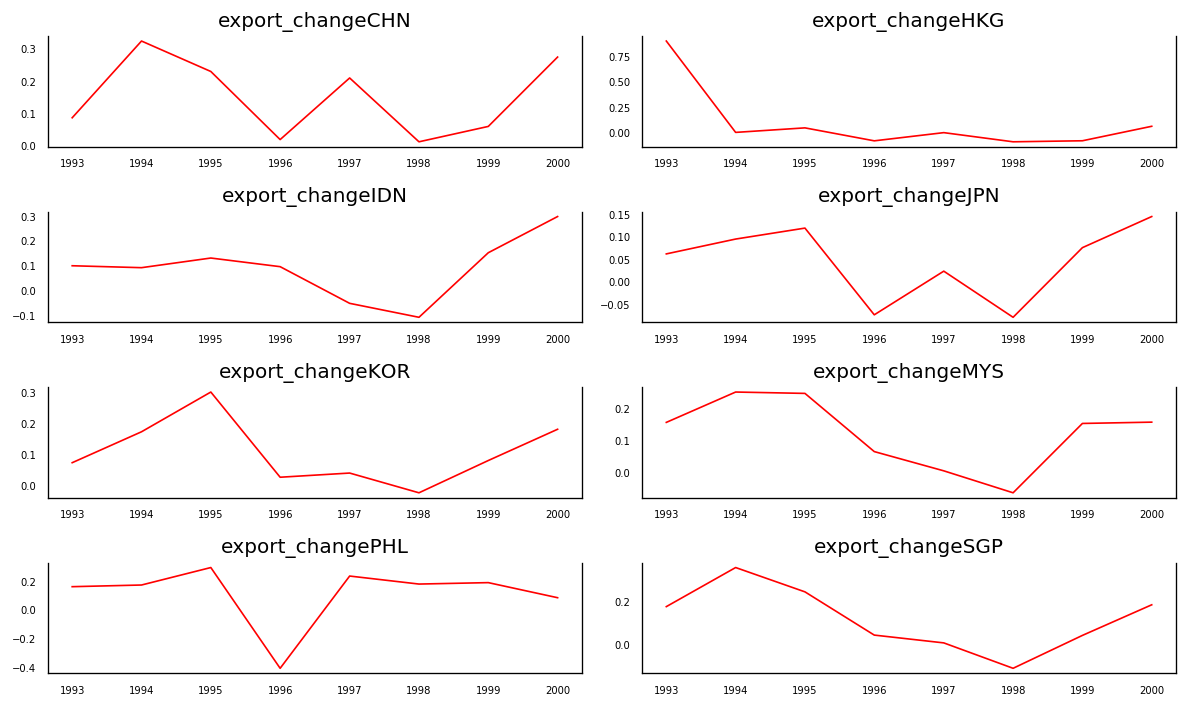

In [211]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = pre_asean[pre_asean.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(pre_asean.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

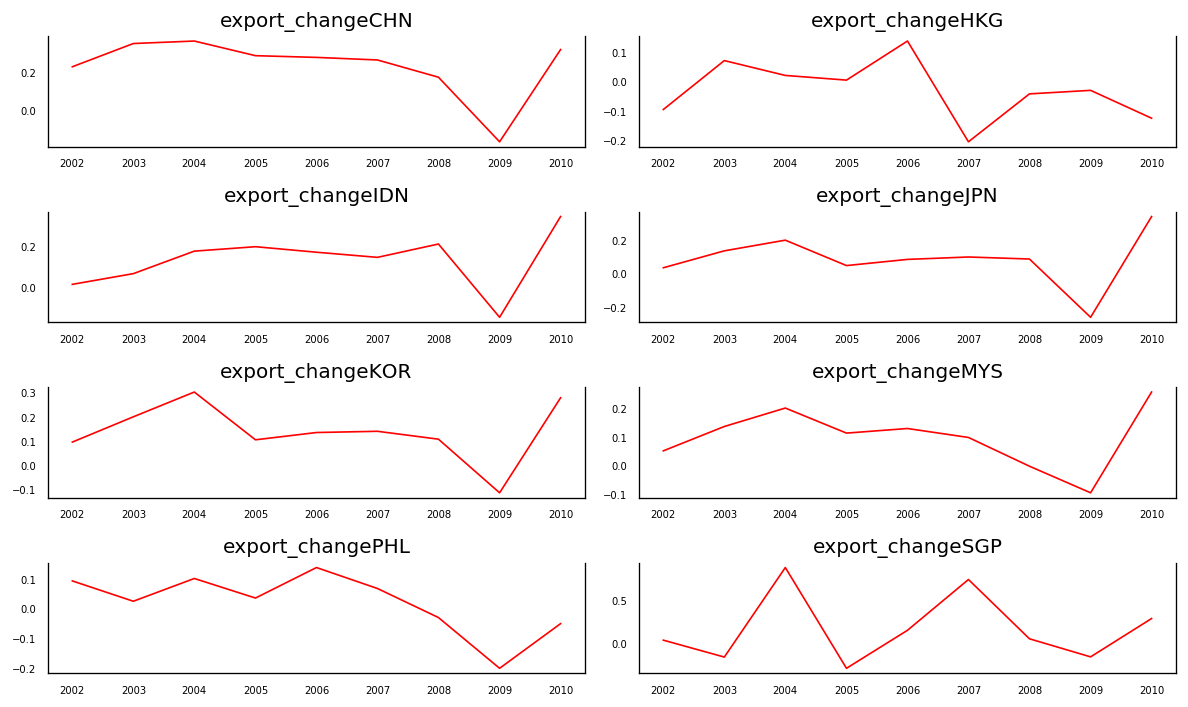

In [141]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = post_asean[post_asean.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(pre_asean.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [247]:
from statsmodels.tsa.stattools import grangercausalitytests
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables,maxlag, test='ssr_chi2test',verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [311]:

grangers_causation_matrix(df_perc_var, variables = df_perc_var.columns,maxlag=1)

,export_changeCHN_x,export_changeHKG_x,export_changeIDN_x,export_changeJPN_x,export_changeKOR_x,export_changeMYS_x,export_changePHL_x,export_changeSGP_x,export_changeTHA_x,GFC_x,Post_Asean_x,PostAsean*GFC_x
export_changeCHN_y,1.0000,0.3269,0.4060,0.3818,0.5975,0.3647,0.4038,0.8803,0.7243,0.1365,0.2425,0.1365
export_changeHKG_y,0.3341,1.0000,0.4267,0.2830,0.4091,0.1696,0.9850,0.8445,0.4040,0.4220,0.5641,0.4220
export_changeIDN_y,0.8474,0.9858,1.0000,0.8387,0.4089,0.0934,0.5214,0.4087,0.3616,0.8895,0.1067,0.8895
export_changeJPN_y,0.6756,0.5911,0.1782,1.0000,0.4277,0.0391,0.6676,0.7290,0.3810,0.3323,0.1311,0.3323
export_changeKOR_y,0.8387,0.5847,0.0472,0.3329,1.0000,0.0471,0.8558,0.8382,0.5048,0.5947,0.2477,0.5947
export_changeMYS_y,0.0838,0.1524,0.0002,0.0047,0.0263,1.0000,0.9012,0.2748,0.0734,0.9123,0.6614,0.9123
export_changePHL_y,0.9936,0.4847,0.2007,0.5437,0.1444,0.8729,1.0000,0.6022,0.3153,0.0280,0.3511,0.0280
export_changeSGP_y,0.3397,0.1165,0.7587,0.3641,0.3230,0.0738,0.6157,1.0000,0.0556,0.4973,0.3497,0.4973
export_changeTHA_y,0.6221,0.2675,0.1129,0.1188,0.3325,0.1393,0.9883,0.9971,1.0000,0.6898,0.1613,0.6898
GFC_y,0.1010,0.3636,0.0737,0.0555,0.2801,0.7280,0.6950,0.0220,0.0843,1.0000,0.2588,1.0000


In [312]:
grangers_causation_matrix(pre_asean, variables = pre_asean.columns,maxlag=1)

,export_changeCHN_x,export_changeHKG_x,export_changeIDN_x,export_changeJPN_x,export_changeKOR_x,export_changeMYS_x,export_changePHL_x,export_changeSGP_x,export_changeTHA_x
export_changeCHN_y,1.0000,0.1284,0.0232,0.1787,0.9572,0.0205,0.5359,0.0027,0.1147
export_changeHKG_y,0.9838,1.0000,0.0203,0.4824,0.9746,0.1411,0.4558,0.2899,0.5389
export_changeIDN_y,0.5623,0.7783,1.0000,0.6416,0.8827,0.8276,0.1607,0.6533,0.9319
export_changeJPN_y,0.2661,0.6510,0.3848,1.0000,0.1355,0.4282,0.8075,0.7643,0.8974
export_changeKOR_y,0.5356,0.5387,0.2575,0.1359,1.0000,0.0002,0.8056,0.0034,0.0003
export_changeMYS_y,0.4276,0.2113,0.6372,0.8078,0.0846,1.0000,0.5829,0.7988,0.9976
export_changePHL_y,0.9715,0.7669,0.1994,0.3392,0.0094,0.3047,1.0000,0.6587,0.2873
export_changeSGP_y,0.0193,0.0297,0.4475,0.8653,0.1375,0.5300,0.8661,1.0000,0.9154
export_changeTHA_y,0.3290,0.2554,0.5528,0.9926,0.0001,0.2980,0.8719,0.3066,1.0000


In [313]:
grangers_causation_matrix(post_asean, variables = ['export_changeCHN',
'export_changeHKG',
'export_changeIDN',
'export_changeJPN',
'export_changeKOR',
'export_changeMYS',
'export_changePHL',
'export_changeSGP',
'export_changeTHA','PostAsean*GFC'],maxlag=1)

,export_changeCHN_x,export_changeHKG_x,export_changeIDN_x,export_changeJPN_x,export_changeKOR_x,export_changeMYS_x,export_changePHL_x,export_changeSGP_x,export_changeTHA_x,PostAsean*GFC_x
export_changeCHN_y,1.0000,0.4977,0.0000,0.0007,0.6735,0.0404,0.6823,0.6803,0.0100,0.0000
export_changeHKG_y,0.1282,1.0000,0.4600,0.2944,0.2790,0.2563,0.5568,0.3919,0.4555,0.2570
export_changeIDN_y,0.4993,0.7066,1.0000,0.9115,0.4844,0.0380,0.6215,0.3141,0.3395,0.0844
export_changeJPN_y,0.0112,0.5556,0.0100,1.0000,0.0355,0.0001,0.3106,0.8412,0.7141,0.0001
export_changeKOR_y,0.7496,0.4426,0.0003,0.0451,1.0000,0.0665,0.9971,0.5369,0.3392,0.0267
export_changeMYS_y,0.0292,0.2060,0.0000,0.0000,0.0474,1.0000,0.1567,0.2233,0.0000,0.2250
export_changePHL_y,0.5480,0.2044,0.2638,0.4072,0.8593,0.0931,1.0000,0.1575,0.7344,0.0000
export_changeSGP_y,0.4741,0.0730,0.9493,0.6155,0.5276,0.2255,0.5103,1.0000,0.2715,0.2607
export_changeTHA_y,0.1342,0.4303,0.0131,0.4365,0.6455,0.0001,0.2673,0.9617,1.0000,0.0000
PostAsean*GFC_y,0.1537,0.0208,0.0522,0.0752,0.3295,0.6566,0.1791,0.1065,0.0309,1.0000


In [145]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [214]:
# ADF Test on each column
for name, column in df_perc_var.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "export_changeCHN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4184
 No. Lags Chosen       = 6
 Critical value 1%     = -4.223
 Critical value 5%     = -3.189
 Critical value 10%    = -2.73
 => P-Value = 0.0103. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "export_changeHKG" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.1928
 No. Lags Chosen       = 7
 Critical value 1%     = -4.332
 Critical value 5%     = -3.233
 Critical value 10%    = -2.749
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "export_changeIDN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stat

In [185]:
# 1st difference
df_differenced = df_perc_var.diff().dropna()

In [186]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "export_changeCHN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2246
 No. Lags Chosen       = 6
 Critical value 1%     = -4.332
 Critical value 5%     = -3.233
 Critical value 10%    = -2.749
 => P-Value = 0.1974. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "export_changeHKG" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.9404
 No. Lags Chosen       = 1
 Critical value 1%     = -3.964
 Critical value 5%     = -3.085
 Critical value 10%    = -2.682
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "export_changeIDN" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [341]:
model = VAR(df_perc_var[['export_changeCHN',
'export_changeHKG',
'export_changeIDN',
'export_changeJPN',
'export_changeKOR',
'export_changeMYS',
'export_changePHL',
'export_changeSGP',
'export_changeTHA','PostAsean*GFC']])
model_fitted = model.fit(2)
varsummary=model_fitted.summary()

In [342]:
varsummary

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Apr, 2020
Time:                     15:50:12
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -688.024
Nobs:                     16.0000    HQIC:                  -697.645
Log likelihood:           5568.28    FPE:               1.21105e-306
AIC:                     -698.164    Det(Omega_mle):    2.76914e-310
--------------------------------------------------------------------
Results for equation export_changeCHN
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.129591         0.000000     27243879.625           0.000
L1.export_changeCHN        -0.012710         0.000000      -417514.167           0.000
L1.export_changeHKG      

In [234]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df_perc_var.columns, out):
    print(col, ':', round(val, 2))

export_changeCHN : 0.47
export_changeHKG : 1.53
export_changeIDN : 1.83
export_changeJPN : 2.38
export_changeKOR : 0.49
export_changeMYS : 0.71
export_changePHL : 0.63
export_changeSGP : 2.05
export_changeTHA : 1.08
AFC : 1.89
GFC : 1.79
Post_Asean : 0.25
PostAsean*GFC : 1.78
